In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000,
                                                        test_split=0.2)

category = np.max(y_train) + 1
print(category)
print('Train data:', len(X_train))
print('Test data:', len(X_test))

46
Train data: 8982
Test data: 2246


C:\Users\BIT\miniconda3\envs\py38-env2\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\BIT\miniconda3\envs\py38-env2\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100)) # {(100+100)*100+100}*4
model.add(layers.LSTM(100, activation = 'tanh'))
model.add(layers.Dense(46, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [17]:
import tensorflow as tf
params = {'model_name': 'reuters',
         'input_dim': 1000,
         'embed_out': 100,
         'lstm_out': 100,
         'dense_out': 46}

class ReuterClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(ReuterClassifier, self).__init__(name=kargs['model_name'])
        self.embd = layers.Embedding(kargs['input_dim'], kargs['embed_out'])
        self.lstm = layers.LSTM(kargs['lstm_out'], activation='tanh')
        self.dense = layers.Dense(kargs['dense_out'], activation='softmax')
        
    def call(self, x):
        x = self.embd(x)
        x = self.lstm(x)
        x = self.dense(x)
        
        return x

In [18]:
model = ReuterClassifier(**params)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [21]:
history = model.fit(X_train, y_train, batch_size = 20,
                   epochs=200, validation_data=(X_test, y_test),
                   callbacks=[early_stopping])

Epoch 1/200
450/450 [==============================] - 17s 38ms/step - loss: 2.2127 - accuracy: 0.4274 - val_loss: 1.9560 - val_accuracy: 0.4889
Epoch 2/200
450/450 [==============================] - 16s 37ms/step - loss: 1.8071 - accuracy: 0.5390 - val_loss: 1.7345 - val_accuracy: 0.5663
Epoch 3/200
450/450 [==============================] - 17s 37ms/step - loss: 1.6560 - accuracy: 0.5787 - val_loss: 1.6376 - val_accuracy: 0.5837
Epoch 4/200
450/450 [==============================] - 17s 37ms/step - loss: 1.5131 - accuracy: 0.6118 - val_loss: 1.4870 - val_accuracy: 0.6229
Epoch 5/200
450/450 [==============================] - 17s 37ms/step - loss: 1.3575 - accuracy: 0.6515 - val_loss: 1.4158 - val_accuracy: 0.6402
Epoch 6/200
450/450 [==============================] - 17s 37ms/step - loss: 1.2298 - accuracy: 0.6875 - val_loss: 1.2920 - val_accuracy: 0.6723
Epoch 7/200
450/450 [==============================] - 17s 37ms/step - loss: 1.1383 - accuracy: 0.7155 - val_loss: 1.2376 - val_ac

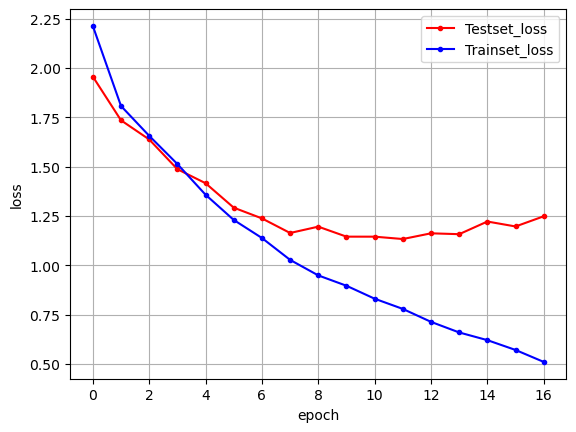

In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()